In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gerencias/lineas

#### Cargue base general

In [2]:
df_base = pd.read_excel("C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/base_productos.xlsx")

In [3]:
df_base.columns

Index(['Ano', 'Mes', 'Distrito', 'Gerente', 'Linea', 'Ventas_mill'], dtype='object')

#### Group by distrito/gerencia/linea

In [4]:
df_gcia = df_base

In [5]:
base_dtos = df_base['Distrito']
base_dtos = base_dtos.drop_duplicates()

#### Medidas para nacional

In [8]:
#Distrito
df_mean_nal = df_gcia.groupby(['Distrito', 'Gerente', 'Linea']).mean()
df_mean_nal.rename({'Ventas_mill': 'media_mill'}, axis = 1, inplace = True)
df_mean_nal = pd.DataFrame(df_mean_nal['media_mill'])
df_sum_nal = df_gcia.groupby(['Distrito', 'Gerente', 'Linea']).sum()
df_sum_nal.rename({'Ventas_mill': 'suma_mill'}, axis = 1, inplace = True)
df_sum_nal = pd.DataFrame(df_sum_nal['suma_mill'])
df_sd_nal = df_gcia.groupby(['Distrito', 'Gerente', 'Linea']).std()
df_sd_nal.rename({'Ventas_mill': 'desviacion_mill'}, axis = 1, inplace = True)
df_sd_nal = pd.DataFrame(df_sd_nal['desviacion_mill'])
df_nal = pd.concat([df_sum_nal, df_mean_nal, df_sd_nal], axis = 1, join = "inner")
df_nal['IV'] = df_nal['desviacion_mill'] / df_nal['media_mill']
df_nal.reset_index(inplace=True)
df_nal

,Distrito,Gerente,Linea,suma_mill,media_mill,desviacion_mill,IV
0,10,Aseo - Familia,Familia,3870.447220,322.537268,68.947384,0.213766
1,10,Aseo - Kimberly,Kimberly,7882.899534,656.908294,100.177186,0.152498
2,10,Cartulina,Cartón Colombia,2565.205070,233.200461,144.302157,0.618790
3,10,Cartulina,Cmpc,5425.728885,452.144074,389.633748,0.861747
4,10,Cartulina,Gold East,6.186816,6.186816,NaN,NaN
...,...,...,...,...,...,...,...
999,90,Resmilla,Resmilla - Otros,14.088354,1.174029,1.705822,1.452964
1000,90,Resmilla,Resmilla - Reprograf,4423.774218,368.647851,142.517893,0.386596
1001,90,Tecnología Institucional,Tecnología institucional,15.656926,1.304744,1.012494,0.776010
1002,90,Textil,Sustratos,10.268450,1.026845,1.067501,1.039593


In [10]:
#Distrito
df_nal.replace([np.inf, -np.inf], np.nan, inplace = True)
df_nal.dropna(inplace = True)
df_nal = df_nal.loc[df_nal2['IV'] >= 0]
df_nal.sort_values(by = ['Gerente', 'Linea'], inplace = True, ascending = True)
df_nal

,Distrito,Gerente,Linea,suma_mill,media_mill,desviacion_mill,IV
0,10,Aseo - Familia,Familia,3870.447220,322.537268,68.947384,0.213766
72,15,Aseo - Familia,Familia,1292.738041,107.728170,24.885662,0.231004
112,17,Aseo - Familia,Familia,340.158149,28.346512,8.183657,0.288701
154,20,Aseo - Familia,Familia,2940.257240,245.021437,48.137934,0.196464
218,25,Aseo - Familia,Familia,1297.271465,108.105955,27.558328,0.254920
...,...,...,...,...,...,...,...
730,65,Textil,Tintas,55.664743,5.060431,5.111340,1.010060
788,70,Textil,Tintas,209.106909,17.425576,7.382886,0.423681
843,71,Textil,Tintas,36.507771,3.042314,0.917360,0.301534
950,75,Textil,Tintas,13.064243,1.187658,0.574791,0.483970


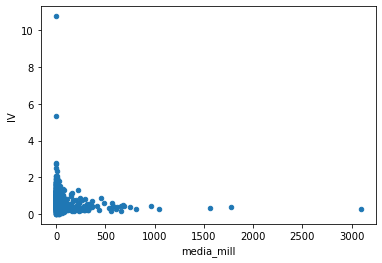

In [11]:
#Distrito
df_nal.plot(kind = 'scatter', x = 'media_mill', y = 'IV')
plt.show()

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

###### General

In [13]:
x = df_nal['media_mill'].values
y = df_nal['IV'].values

In [14]:
X = np.array(list(zip(x, y)))

In [15]:
kmeans = KMeans(n_clusters = 5)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [16]:
colors = ['m.', 'r.', 'c.', 'y.', 'g.', 'b.']

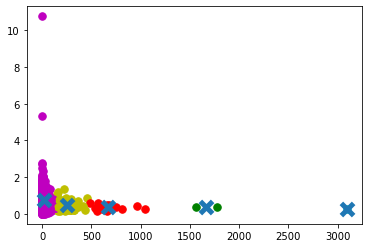

In [17]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 15)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()

In [18]:
model = {"Distrito": df_nal['Distrito'], "Gerente": df_nal['Gerente'], "Linea": df_nal['Linea'],
         "Media_mill": df_nal['media_mill'],"Desviacion_mill":  df_nal['desviacion_mill'],
         "Suma_mill":  df_nal['suma_mill'],"IV":  df_nal['IV'], "Cluster": labels}
df_model = pd.DataFrame(model)

In [19]:
df_model.to_csv('modelo_gerencias_distrito.csv', index = False)

##### Distritos 

In [53]:
base_dtos = df_nal['Distrito']
base_dtos = base_dtos.drop_duplicates()
for i in base_dtos:
    #Definicion de valores x y y 
    df_nal2 = df_nal[df_nal['Distrito'] == i]
    x = df_nal2['media_mill'].values
    y = df_nal2['IV'].values
    X = np.array(list(zip(x, y)))
    #Parametros Kmeans
    kmeans = KMeans(n_clusters = 5)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    #Diccionario resutado
    model_dtos = {"Distrito": df_nal2['Distrito'], "Gerente": df_nal2['Gerente'], "Linea": df_nal2['Linea'],
         "Media_mill": df_nal2['media_mill'],"Desviacion_mill":  df_nal2['desviacion_mill'],
         "Suma_mill":  df_nal2['suma_mill'],"IV":  df_nal2['IV'], "Cluster": labels}
    #DataFrame
    df_model = pd.DataFrame(model_dtos)
    #Guardar archivos
    df_model.to_csv(f'C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/Modelo gerencias/Distrito {i}.csv', index = False, decimal = ",")
    print(f'Distrito {i} listo!')

Distrito 10
Distrito 15
Distrito 17
Distrito 20
Distrito 25
Distrito 40
Distrito 45
Distrito 50
Distrito 52
Distrito 53
Distrito 55
Distrito 60
Distrito 63
Distrito 65
Distrito 70
Distrito 71
Distrito 72
Distrito 75
Distrito 90
Distrito 73


# Clientes

#### Cargue base general

In [56]:
df_base_cte = pd.read_excel("C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/base_clientes.xlsx")

In [57]:
df_base_cte.columns

Index(['Ano', 'Mes', 'Distrito', 'Cliente', 'Ventas_mill'], dtype='object')

#### Group by gerencia/linea

In [58]:
df_cte = df_base_cte

#### Medidas para nacional

In [60]:
df_mean_nal_cte = df_cte.groupby(['Distrito', 'Cliente']).mean()
df_mean_nal_cte.rename({'Ventas_mill': 'media_mill'}, axis = 1, inplace = True)
df_sum_nal_cte = df_cte.groupby(['Distrito', 'Cliente']).sum()
df_sum_nal_cte.rename({'Ventas_mill': 'suma_mill'}, axis = 1, inplace = True)
df_sd_nal_cte = df_cte.groupby(['Distrito', 'Cliente']).std()
df_sd_nal_cte.rename({'Ventas_mill': 'desviacion_mill'}, axis = 1, inplace = True)
df_nal_cte = pd.concat([df_sum_nal_cte, df_mean_nal_cte, df_sd_nal_cte], axis = 1, join = "inner")
df_nal_cte['IV'] = df_nal_cte['desviacion_mill'] / df_nal_cte['media_mill']
df_nal_cte.reset_index(inplace=True)
df_nal_cte

,Distrito,Cliente,Ano,Mes,suma_mill,Ano,Mes,media_mill,Ano,Mes,desviacion_mill,IV
0,10,1,4042,21,1272.85147,2021.000000,10.500000,636.425735,0.000000,0.707107,709.345559,1.114577
1,10,10,16172,52,5081.06940,2021.500000,6.500000,635.133675,0.534522,4.440077,790.905103,1.245258
2,10,12,2021,12,2130.21068,2021.000000,12.000000,2130.210680,NaN,NaN,NaN,NaN
3,10,99,24256,78,258988.27913,2021.333333,6.500000,21582.356594,0.492366,3.605551,8097.315875,0.375182
4,10,500,12126,45,12458.79773,2021.000000,7.500000,2076.466288,0.000000,1.870829,1160.910370,0.559080
...,...,...,...,...,...,...,...,...,...,...,...,...
30339,90,1234638440,14151,41,13323.84580,2021.571429,5.857143,1903.406543,0.534522,4.375255,2341.923516,1.230385
30340,90,1234639050,2022,3,163.24442,2022.000000,3.000000,163.244420,NaN,NaN,NaN,NaN
30341,90,1234642712,16171,45,778.98433,2021.375000,5.625000,97.373041,0.517549,3.502550,126.600699,1.300162
30342,90,1234645811,2021,5,63.90100,2021.000000,5.000000,63.901000,NaN,NaN,NaN,NaN


In [66]:
meannan1_cte = df_nal_cte['desviacion_mill'].mean()
meannan2_cte = df_nal_cte['IV'].median()

df_nal_cte['IV'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_nal_cte['desviacion_mill'].replace([np.inf, -np.inf], np.nan, inplace=True)

df_nal_cte['desviacion_mill'].fillna(value=meannan1_cte, inplace=True)
df_nal_cte['IV'].fillna(value=meannan2_cte, inplace=True)

df_nal_cte.dropna(inplace = True)

df_nal_cte = df_nal_cte.loc[df_nal_cte['IV'] >= 0]
df_nal_cte = df_nal_cte.loc[df_nal_cte['IV'] <= 100]
df_nal_cte = df_nal_cte.loc[df_nal_cte['media_mill'] >= 0]
df_nal_cte

C:\Users\TCARDE~1\AppData\Local\Temp/ipykernel_28220/2999804787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nal_cte['IV'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\TCARDE~1\AppData\Local\Temp/ipykernel_28220/2999804787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nal_cte['desviacion_mill'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\TCARDE~1\AppData\Local\Temp/ipykernel_28220/2999804787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Distrito,Cliente,Ano,Mes,suma_mill,Ano,Mes,media_mill,Ano,Mes,desviacion_mill,IV
0,10,1,4042,21,1272.85147,2021.000000,10.500000,636.425735,0.000000,0.707107,709.345559,1.114577
1,10,10,16172,52,5081.06940,2021.500000,6.500000,635.133675,0.534522,4.440077,790.905103,1.245258
3,10,99,24256,78,258988.27913,2021.333333,6.500000,21582.356594,0.492366,3.605551,8097.315875,0.375182
4,10,500,12126,45,12458.79773,2021.000000,7.500000,2076.466288,0.000000,1.870829,1160.910370,0.559080
8,10,21513,4042,15,13.65126,2021.000000,7.500000,6.825630,0.000000,0.707107,3.217633,0.471405
...,...,...,...,...,...,...,...,...,...,...,...,...
30333,90,1115731137,4042,17,33.94543,2021.000000,8.500000,16.972715,0.000000,3.535534,4.482046,0.264074
30334,90,1117527376,10108,29,100.59928,2021.600000,5.800000,20.119856,0.547723,5.263079,9.498384,0.472090
30339,90,1234638440,14151,41,13323.84580,2021.571429,5.857143,1903.406543,0.534522,4.375255,2341.923516,1.230385
30341,90,1234642712,16171,45,778.98433,2021.375000,5.625000,97.373041,0.517549,3.502550,126.600699,1.300162


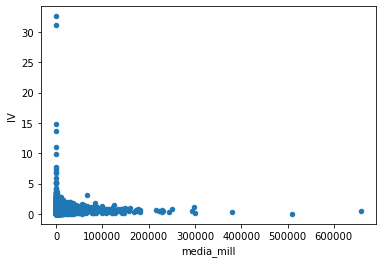

In [67]:
df_nal_cte.plot(kind = 'scatter', x = 'media_mill', y = 'IV')

plt.show()

In [68]:
x2 = df_nal_cte['media_mill'].values
y2 = df_nal_cte['IV'].values

In [69]:
X2 = np.array(list(zip(x2, y2)))

In [72]:
kmeans2 = KMeans(n_clusters = 5)
kmeans2 = kmeans2.fit(X2)
labels2 = kmeans2.predict(X2)
centroids2 = kmeans2.cluster_centers_

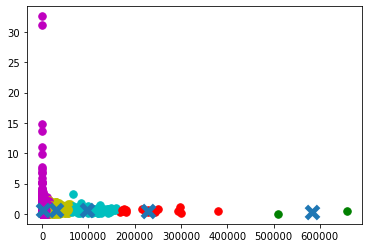

In [73]:
for i in range(len(X2)):
    plt.plot(X2[i][0], X2[i][1], colors[labels2[i]], markersize = 15)
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()

In [75]:
base_dtos2 = df_nal_cte['Distrito']
base_dtos2 = base_dtos.drop_duplicates()
for i in base_dtos2:
    #Definicion de valores x y y 
    df_nal2 = df_nal_cte[df_nal_cte['Distrito'] == i]
    x = df_nal2['media_mill'].values
    y = df_nal2['IV'].values
    X = np.array(list(zip(x, y)))
    #Parametros Kmeans
    kmeans = KMeans(n_clusters = 5)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    #Diccionario resutado
    model_dtos = {"Distrito": df_nal2['Distrito'], "Cliente": df_nal2['Cliente'], "Media_mill": df_nal2['media_mill'],
                  "Desviacion_mill":  df_nal2['desviacion_mill'],"Suma_mill":  df_nal2['suma_mill'],"IV":  df_nal2['IV'],
                  "Cluster": labels}
    #DataFrame
    df_model = pd.DataFrame(model_dtos)
    #Guardar archivos
    df_model.to_csv(f'C:/Users/tcardenas/OneDrive/OneDrive - Grupo DISPAPELES/Documents/Análisis clustering/Modelo clientes/Distrito {i}.csv', index = False, decimal = ",")
    print(f'Distrito {i} listo!')

Distrito 10 listo!
Distrito 15 listo!
Distrito 17 listo!
Distrito 20 listo!
Distrito 25 listo!
Distrito 40 listo!
Distrito 45 listo!
Distrito 50 listo!
Distrito 52 listo!
Distrito 53 listo!
Distrito 55 listo!
Distrito 60 listo!
Distrito 63 listo!
Distrito 65 listo!
Distrito 70 listo!
Distrito 71 listo!
Distrito 72 listo!
Distrito 75 listo!
Distrito 90 listo!
Distrito 73 listo!


In [ ]:
model_cte = {"Distrito-cliente": df_nal_cte.index, "Media_mill": df_nal_cte['media_mill'],
                         "Desviacion_mill":  df_nal_cte['desviacion_mill'], "Suma_mill":  df_nal_cte['suma_mill'],
                        "IV":  df_nal_cte['IV'], "Cluster": labels2}
df_model_cte = pd.DataFrame(model_cte)

In [ ]:
df_model_cte.to_csv('modelo_clientes_distrito.csv', index = False)